In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///C:/Users/pmhu4/Documents/GitHub/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
station_data = engine.execute('SELECT * FROM station').fetchall()
station_data

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
measurement_data = engine.execute('SELECT * FROM measurement').fetchall()
measurement_data

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [12]:
Base.classes.keys()

['measurement', 'station']

In [13]:
station = Base.classes.station 
measurement = Base.classes.measurement 


In [14]:
session = Session(engine)

In [15]:
date = '2016-08-23'

# sel = [measurement.date,
#               measurement.prcp]

# weather = for row in session.query(*sel).\
#     filter(measurement.date >= date).all()

# ptps = list(np.ravel(weather))


In [16]:
# Save references to each table
weather = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= date).order_by(measurement.date.desc()).all()
weather

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [17]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

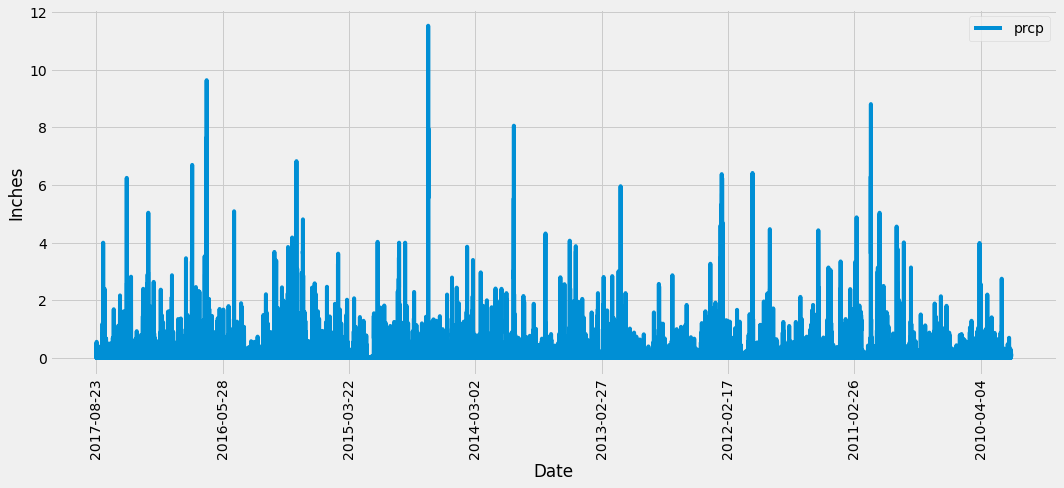

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
weather_12 = pd.DataFrame(weather, columns=('date' , 'prcp'))
weather_12.dropna (how='any', inplace=True)

weather_12.head(25)

weather_12.set_index('date', inplace=True)
weather_12.groupby('date')
weather_12.head(30)
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
# prcp_date = pd.DataFrame(results, columns=['date', 'prcp'])
# prcp_date.set_index('date', inplace=True)
# prcp_date.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
weather_12.plot.line(figsize=(15, 7))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Line_plot")
plt.show()


In [66]:
# weather_12 = pd.DataFrame(weather_12, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
# df.set_index('date', inplace=True)


print(weather_sum_stats)


       mean  max  min      std  entry_count
0  0.177279  6.7  0.0  0.46119         2021


In [55]:
weather_sum_stats = []


mean = weather_12.mean()['prcp']
weather_sum_stats.append(mean)
max = weather_12.max()['prcp']
weather_sum_stats.append(max)
min = weather_12.min()['prcp']
weather_sum_stats.append(min)
std = weather_12.std()['prcp']
weather_sum_stats.append(std)
entry_count = weather_12.count()['prcp']
weather_sum_stats.append(entry_count)

# print(mean)
# print(max)
# print(min)
# print(std)
# print(entry_count)


weather_sum_stats = pd.DataFrame([weather_sum_stats], columns=("mean", 'max', 'min', 'std', 'entry_count'))
weather_sum_stats



# max = weather_12.max()
# weather_sum_stats.append(max)
# min = weather_12.min()
# weather_sum_stats.append(min)
# std = weather_12.std()
# weather_sum_stats.append(std)
# entry_count = weather_12.count()
# weather_sum_stats.append(entry_count)

                                 

,mean,max,min,std,entry_count
0,0.177279,6.7,0.0,0.46119,2021


In [62]:
weather = session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).\
    order_by(measurement.date.desc()).all()
weather

# We can view all of the classes that automap found
# station_data = session.query(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation).\
#     order_by(station.id.desc()).all()
# station_data

[('USC00519397', '2017-08-23', 0.0, 81.0),
 ('USC00514830', '2017-08-23', 0.0, 82.0),
 ('USC00519523', '2017-08-23', 0.08, 82.0),
 ('USC00516128', '2017-08-23', 0.45, 76.0),
 ('USC00519397', '2017-08-22', 0.0, 82.0),
 ('USC00519523', '2017-08-22', 0.0, 82.0),
 ('USC00516128', '2017-08-22', 0.5, 76.0),
 ('USC00519397', '2017-08-21', 0.0, 81.0),
 ('USC00514830', '2017-08-21', 0.02, 79.0),
 ('USC00519523', '2017-08-21', None, 82.0),
 ('USC00516128', '2017-08-21', 0.56, 76.0),
 ('USC00519397', '2017-08-20', 0.0, 81.0),
 ('USC00514830', '2017-08-20', 0.01, 80.0),
 ('USC00516128', '2017-08-20', None, 78.0),
 ('USC00519397', '2017-08-19', 0.0, 79.0),
 ('USC00514830', '2017-08-19', 0.0, 80.0),
 ('USC00519523', '2017-08-19', None, 85.0),
 ('USC00516128', '2017-08-19', 0.09, 71.0),
 ('USC00519397', '2017-08-18', 0.0, 80.0),
 ('USC00514830', '2017-08-18', 0.0, 77.0),
 ('USC00519281', '2017-08-18', 0.06, 79.0),
 ('USC00516128', '2017-08-18', None, 76.0),
 ('USC00514830', '2017-08-17', 0.0, 78.0),


In [41]:
# Design a query to show how many stations are available in this dataset?
# staion_count = session.query(station.station, measurement.station, )
# staion_count

# Save references to each table
station_count = session.query(measurement.date, measurement.prcp, measurement.station).\
    order_by(measurement.date.desc()).all()
station_count

station_data = pd.DataFrame(station_count, columns=('date', 'prcp', 'station'), ).groupby('station')
count = station_data.count()['prcp'].max()
count
# values = station_data['station'].unique()
# values

# unique = station_data['station'].nunique()
# unique

# for station in 

2772

In [42]:
# array(['USC00519397', 'USC00514830', 'USC00519523', 'USC00516128',
#        'USC00519281', 'USC00513117', 'USC00517948', 'USC00518838',
#        'USC00511918'], dtype=object)

In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_data = pd.DataFrame(station_count, columns=('date', 'prcp', 'station')).groupby('station')
count = station_data.count()['prcp']
count

station
USC00511918    1932
USC00513117    2696
USC00514830    1937
USC00516128    2484
USC00517948     683
USC00518838     342
USC00519281    2772
USC00519397    2685
USC00519523    2572
Name: prcp, dtype: int64

In [44]:
station_data.head(10)

,date,prcp,station
0,2017-08-23,0.00,USC00519397
1,2017-08-23,0.00,USC00514830
2,2017-08-23,0.08,USC00519523
3,2017-08-23,0.45,USC00516128
4,2017-08-22,0.00,USC00519397
...,...,...,...
4170,2015-10-21,0.00,USC00511918
4176,2015-10-20,0.00,USC00518838
4179,2015-10-20,0.30,USC00511918
4186,2015-10-19,0.00,USC00511918


In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
weather_2 = session.query(measurement.date, measurement.tobs, measurement.station).\
    filter(measurement.station == 'USC00519281')
weather_2 = pd.DataFrame(weather_2)
weather_2.dropna (how='any', inplace=True)

weather_2.count()

date       2772
tobs       2772
station    2772
dtype: int64

In [72]:
temp_sum_stats = []


mean = weather_2.mean()['tobs']
temp_sum_stats.append(mean)
max = weather_2.max()['tobs']
temp_sum_stats.append(max)
min = weather_2.min()['tobs']
temp_sum_stats.append(min)

temp_sum_stats

temp_sum_stats = pd.DataFrame([temp_sum_stats], columns=("mean", 'max', 'min'))
temp_sum_stats



,mean,max,min
0,71.663781,85.0,54.0


In [101]:
# Choose the station with the highest number of temperature observations.
# weather = pd.DataFrame(weather)
# w_count = weather.count()['tobs']
# w_count

weather_count = session.query(measurement.date, measurement.tobs, measurement.station).\
    order_by(measurement.date.desc()).all()
weather_count = pd.DataFrame(weather_count, columns=('date', "temperature", 'station')).groupby('station')
weather_count.count()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_12 = session.query(measurement.date, measurement.tobs, measurement.station).\
    filter((measurement.station == 'USC00519281'), (measurement.date >= date))
temp_12 = pd.DataFrame(temp_12, columns=('date', 'temperature', 'station'))
temp_12


,date,temperature,station
0,2016-08-23,77.0,USC00519281
1,2016-08-24,77.0,USC00519281
2,2016-08-25,80.0,USC00519281
3,2016-08-26,80.0,USC00519281
4,2016-08-27,75.0,USC00519281
...,...,...,...
347,2017-08-14,77.0,USC00519281
348,2017-08-15,77.0,USC00519281
349,2017-08-16,76.0,USC00519281
350,2017-08-17,76.0,USC00519281


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
